In [16]:
import pandas as pd
import requests as rq
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib.dates as dt

import pandas as pd
url1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'

confirmedDf =   pd.read_csv(url1)
deathsDf    =   pd.read_csv(url2)
recoveredDf =   pd.read_csv(url3) 

             0     1      2
1/22/20    555    17     28
1/23/20    653    18     30
1/24/20    941    26     36
1/25/20   1434    42     39
1/26/20   2118    56     52
1/27/20   2927    82     61
1/28/20   5578   131    107
1/29/20   6166   133    126
1/30/20   8234   171    143
1/31/20   9927   213    222
2/1/20   12038   259    284
2/2/20   16787   362    472
2/3/20   19881   426    623
2/4/20   23892   492    852
2/5/20   27636   564   1124
2/6/20   30818   634   1487
2/7/20   34392   719   2011
2/8/20   37121   806   2616
2/9/20   40151   906   3244
2/10/20  42763  1013   3946
2/11/20  44803  1113   4683
2/12/20  45222  1118   5150
2/13/20  60370  1371   6295
2/14/20  66887  1523   8058
2/15/20  69032  1666   9395
2/16/20  71226  1770  10865
2/17/20  73260  1868  12583
2/18/20  75138  2007  14352
2/19/20  75641  2122  16121
2/20/20  76199  2247  18177
2/21/20  76843  2251  18890
2/22/20  78599  2458  22886
2/23/20  78985  2469  23394
2/24/20  79570  2629  25227
2/25/20  80415  2708

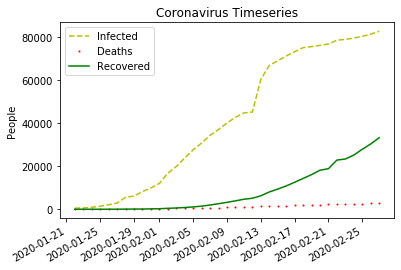

In [70]:
date_times = pd.to_datetime(confirmedDf.iloc[:,4:].columns)

confirmedDfSum = confirmedDf.iloc[:,4:].sum()

deathsDfsum = deathsDf.iloc[:,4:].sum()

recoverDfSum = recoveredDf.iloc[:,4:].sum()

df =pd.DataFrame([confirmedDfSum,deathsDfsum,recoverDfSum])

df = df.T

print(df)
fig, ax = plt.subplots()
ax.set_title('Coronavirus Timeseries')
ax.set_ylabel('People')
ax.plot(date_times,df[0],'y' ,label="Infected", linestyle='--')
ax.plot(date_times,df[1],'r' ,label="Deaths",  linestyle='',marker ='o',markersize=1)
ax.plot(date_times,df[2],'g',label="Recovered",linestyle='-')
ax.legend()

fig.autofmt_xdate()

plt.savefig("Cod19Information") # Call this before plt.show().
plt.show()


